# Atividade 5: Redes Neurais

## Enunciado

Neste *notebook* você encontrará uma função que gera 4 conjuntos de dados totalmente artificiais. A função deve ser usada especificando como argumento o número do conjunto a ser gerado.

Exemplo:

    Xtreino, ytreino, Xteste, yteste = gera_base(1)

> **Classifique todas as bases usando, para cada uma delas, a rede neural mais simples que você conseguir elaborar**.

Tente obter a máxima acurácia possível para cada caso, mas não espere que a acurácia seja 100% em todos os conjuntos de teste.

Para auxliar, você poderá usar a função

    plota_base(Xtreino, ytreino, Xteste, yteste)

para visualizar os dados. Os dados de teste são opcionais na função plot.

## Configuração do *notebook*

Execute todas as células abaixo em sequência para configurar o notebook.

In [1]:
import matplotlib.pyplot as plt

def plota_parte(X, y, mascara, c, nome):
  plt.scatter(X[mascara, 0], X[mascara, 1], c=c, label=nome)

def plota_base(Xtreino, ytreino, Xteste=None, yteste=None):

  if Xteste is not None:
    x0 = min(min(Xtreino[:, 0]), min(Xteste[:, 0])) - 0.1
    x1 = max(max(Xtreino[:, 0]), max(Xteste[:, 0])) + 0.1
    y0 = min(min(Xtreino[:, 1]), min(Xteste[:, 1])) - 0.1
    y1 = max(max(Xtreino[:, 1]), max(Xteste[:, 1])) + 0.1

    plt.figure(figsize=(16, 8))
    plt.subplot(121)
  else:
    plt.figure()

    x0 = min(Xtreino[:, 0]) - 0.1
    x1 = max(Xtreino[:, 0]) + 0.1
    y0 = min(Xtreino[:, 1]) - 0.1
    y1 = max(Xtreino[:, 1]) + 0.1

  plt.xlim(x0, x1)
  plt.ylim(y0, y1)

  plt.plot([x0, x1], [0, 0], 'k--')
  plt.plot([0, 0], [y0, y1], 'k--')

  plt.title('Conjunto de treino')
  plota_parte(Xtreino, ytreino, ytreino==0, 'r', '0')
  plota_parte(Xtreino, ytreino, ytreino==1, 'b', '1')
  plt.legend();

  if Xteste is not None:
    plt.subplot(122)
    plt.title('Conjunto de teste')

    plt.plot([x0, x1], [0, 0], 'k--')
    plt.plot([0, 0], [y0, y1], 'k--')

    plota_parte(Xteste, yteste, yteste==0, 'r', '0')
    plota_parte(Xteste, yteste, yteste==1, 'b', '1')

    plt.xlim(x0, x1)
    plt.ylim(y0, y1)
    plt.legend();

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

def gera_base_2():
  def helper(rng, halfnum, loc, scale):
    x11 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)
    y11 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)

    x12 = rng.normal(size=(halfnum,), loc=loc, scale=scale)
    y12 = rng.normal(size=(halfnum,), loc=loc, scale=scale)

    x21 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)
    y21 = rng.normal(size=(halfnum,), loc=loc, scale=scale)

    x22 = rng.normal(size=(halfnum,), loc=loc, scale=scale)
    y22 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)

    x = np.concatenate([x11, x12, x21, x22])
    y = np.concatenate([y11, y12, y21, y22])
    X = np.array([x,y]).T

    y = np.concatenate((np.zeros(halfnum*2), np.ones(halfnum*2)))

    return X, y

  rng = np.random.RandomState(1337)
  Xtreino, ytreino = helper(rng, 25, 1, 0.4)
  Xteste, yteste = helper(rng, 125, 1, 0.6)

  return Xtreino, ytreino, Xteste, yteste


def gera_base_1():
  def helper(rng, halfnum, loc, scale):
    x1 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)
    y1 = rng.normal(size=(halfnum,), loc=-loc, scale=scale)

    x2 = rng.normal(size=(halfnum,), loc=loc, scale=scale)
    y2 = rng.normal(size=(halfnum,), loc=loc, scale=scale)

    return (np.concatenate(([x1, y1], [x2, y2]), axis=1).T,
            np.concatenate((np.zeros(halfnum), np.ones(halfnum))))

  rng = np.random.RandomState(13)
  Xtreino, ytreino = helper(rng, 50, 1, 0.4)
  Xteste, yteste = helper(rng, 250, 1, 0.6)

  return Xtreino, ytreino, Xteste, yteste


def gera_base_3():
  rng = np.random.RandomState(42)

  Xtreino = rng.randn(100, 2)
  ytreino = np.logical_xor(Xtreino[:, 0] > 0, Xtreino[:, 1] > 0)

  Xteste = rng.randn(500, 2)
  yteste = np.logical_xor(Xteste[:, 0] > 0, Xteste[:, 1] > 0)

  return Xtreino, ytreino, Xteste, yteste


def gera_base_4():
  def helper(rng, num1, num2, loc1, loc2, scale1, scale2):
    x1 = rng.normal(size=(num1,), loc=loc1, scale=scale1)
    y1 = rng.normal(size=(num1,), loc=loc1, scale=scale1)

    x2 = rng.normal(size=(num2,), loc=loc2, scale=scale2)
    y2 = rng.normal(size=(num2,), loc=loc2, scale=scale2)

    return (np.concatenate(([x1, y1], [x2, y2]), axis=1).T,
            np.concatenate((np.zeros(num1), np.ones(num2))))

  rng = np.random.RandomState(13)
  Xtreino, ytreino = helper(rng, 50, 200, -.5, 0.8, 0.4, 0.6)
  Xteste, yteste = helper(rng, 250, 250, -.7, 0.8, 0.6, 0.8)

  return Xtreino, ytreino, Xteste, yteste

In [3]:
def gera_base(num):
  if num == 1:
    return gera_base_1()
  elif num == 2:
    return gera_base_2()
  elif num == 3:
    return gera_base_3()
  elif num == 4:
    return gera_base_4()
  else:
    print('Bases disponíveis são de 1 a 4.')

## Exemplo de uso

Na célula abaixo você tem a obtenção da base 1 e um *plot* dos dados de treino.

Modifique a célula para plotar também os dados de teste.

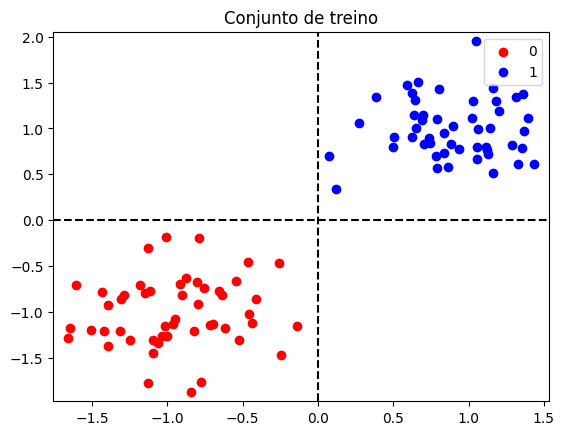

In [4]:
Xtreino, ytreino, Xteste, yteste = gera_base(1)
plota_base(Xtreino, ytreino)

# Resolução do *notebook*

Agora é com você.

> **Classifique as 4 bases usando, para cada uma delas, a rede neural mais simples que você conseguir elaborar**.

## Importando Bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


## Código para treinar rede neural para cada base artificial

In [17]:
bases = [gera_base(i) for i in range(1, 5)]

def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(2,)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Previsão
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    
    return accuracy, y_pred

accuracies = []
for i, (X_train, y_train, X_test, y_test) in enumerate(bases):
    accuracy = train_and_evaluate(X_train, y_train, X_test, y_test)
    accuracies.append((i+1, accuracy))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## Acurácia de cada base

In [18]:
accuracies = []
predictions = []

for i, (X_train, y_train, X_test, y_test) in enumerate(bases):
    accuracy, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test)
    accuracies.append((i+1, accuracy))
    predictions.append((X_test, y_test, y_pred))

for i, accuracy in accuracies:
    print(f"Base {i}: Acurácia = {accuracy:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Base 1: Acurácia = 0.98
Base 2: Acurácia = 0.90
Base 3: Acurácia = 0.88
Base 4: Acurácia = 0.94


## Gráficos das bases

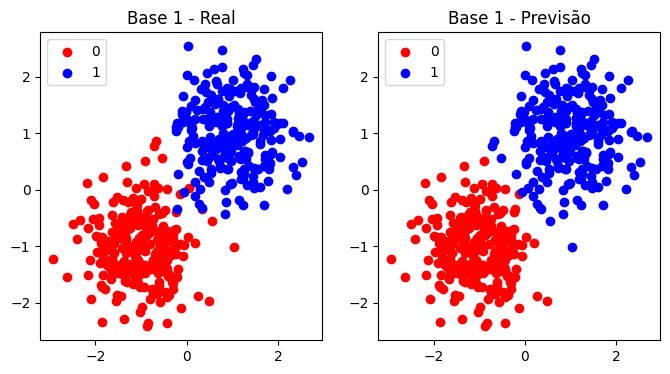

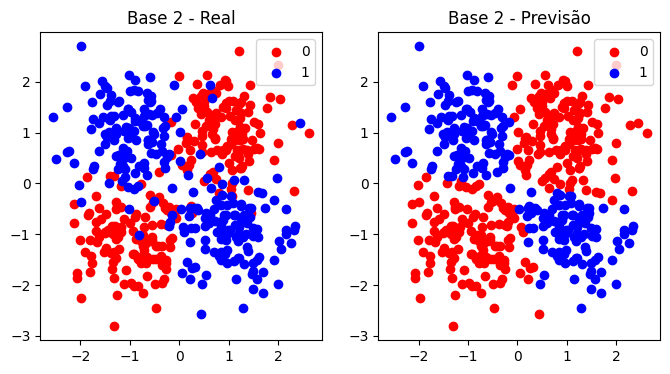

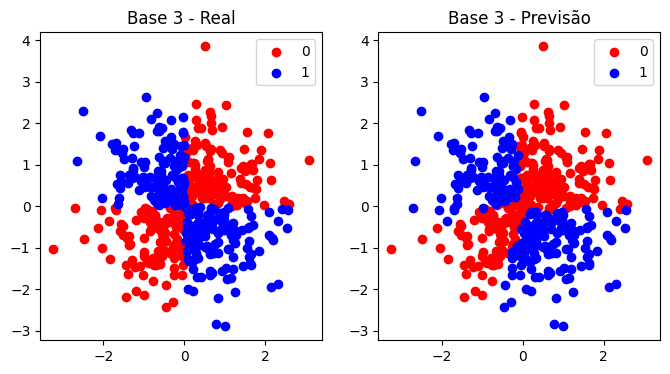

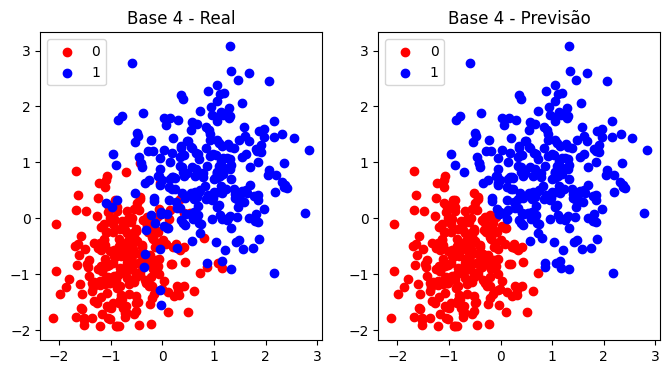

In [19]:
for i, (X_test, y_test, y_pred) in enumerate(predictions):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Base {i+1} - Real")
    plota_parte(X_test, y_test, y_test == 0, 'r', '0')
    plota_parte(X_test, y_test, y_test == 1, 'b', '1')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title(f"Base {i+1} - Previsão")
    plota_parte(X_test, y_pred, y_pred == 0, 'r', '0')
    plota_parte(X_test, y_pred, y_pred == 1, 'b', '1')
    plt.legend()
    
    plt.show()